# Lab 2 - Elementary Music Synthesis and Convolution


In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import scipy.signal
from scipy import *
import copy
import pylab as pl
from scipy import signal
import time as t
from IPython import display
import simpleaudio as sa

# 1) Music Synthesis

In this section you will be generating some tones and combining them in ways that make them better perceptible.

In [8]:
# SimpleAudio constants.
DEFAULT_SAMPLE_RATE = 8000
DEFAULT_AMPLITUDE = 1
DEFAULT_BYTES_PER_SAMPLE = 2
DEFAULT_NUM_CHANNELS = 1

SINGLE_COUNT = 0.25


# Musical note frequencies.
A = 220.0
B = A * 2 ** (2 / 12)
C = A * 2 ** (3 / 12)
E = A * 2 ** (7 / 12)


#quarter note
n_q = np.arange(0, SINGLE_COUNT, 1/DEFAULT_SAMPLE_RATE)

#half note
n_h = np.arange(0, 2*SINGLE_COUNT, 1/DEFAULT_SAMPLE_RATE)

#whole note
n_w = np.arange(0, 4*SINGLE_COUNT, 1/DEFAULT_SAMPLE_RATE)


A_Note = np.sin(2*np.pi*A*n_w)
B_Note = np.sin(2*np.pi*B*n_h)
C_Note = np.sin(2*np.pi*C*n_q)
E_Note = np.sin(2*np.pi*E*n_w)

sa.play_buffer((A_Note * 32767).astype('int16'), 1, 2, 8000).wait_done()
sa.play_buffer((B_Note * 32767).astype('int16'), 1, 2, 8000).wait_done()
sa.play_buffer((C_Note * 32767).astype('int16'), 1, 2, 8000).wait_done()
sa.play_buffer((E_Note * 32767).astype('int16'), 1, 2, 8000).wait_done()


In [9]:
def play(notes, concatenated_flag, num_channels=DEFAULT_NUM_CHANNELS, bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE,
         sample_rate=DEFAULT_SAMPLE_RATE):
    
    
    score = np.asarray([])
    
    if not concatenated_flag:
        score = np.concatenate(notes)
    else:
        score = notes
    
    sa.play_buffer((score * 32767).astype('int16'), DEFAULT_NUM_CHANNELS, DEFAULT_BYTES_PER_SAMPLE, DEFAULT_SAMPLE_RATE).wait_done()
   
    # TO DO: finish the play function to play the contents of "data"

def display_envelope(signal,duration=-1,sample_rate=DEFAULT_SAMPLE_RATE,bytes_per_sample=DEFAULT_BYTES_PER_SAMPLE):

    """
    Plots the envelope of a duration of the generated audio. 

    Args:
        signal: The audio signal to be displayed (as a NumPy array).
        duration: The length of hte signal to be displayed. -1 to display entire signal.
        num_channels: The number of audio channels.
        bytes_per_sample: The number of bytes per sample per channel.
        sample_rate: The sample rate.
    """
    
    from scipy.signal import hilbert
    
    if duration < 0:
        duration = len(signal)/sample_rate
    
    n = int(duration*sample_rate)
    
    analytic_signal = hilbert(signal[0:n])
    amplitude_envelope = np.abs(analytic_signal)
        
    t = np.linspace(0,duration,len(amplitude_envelope))
    
    plt.figure()    
    plt.plot(t,amplitude_envelope)
    plt.show()

In [10]:
# defining note function 

def note(frequency, note_type, amplitude=DEFAULT_AMPLITUDE, sample_rate=DEFAULT_SAMPLE_RATE):
    
    Note = np.sin(2*np.pi*frequency*note_type)
    
    return Note
 
#the Scarborough Fair Score
SF_score = [note(A, n_h), note(A, n_q), note(E, n_q), note(E, n_q), note(E, n_q), note(B, n_q), note(C, n_q), note(B, n_q), note(A, n_w)]

play(SF_score, False)


In [11]:


def Scarborough_Fair():
    
    play(SF_score, False)
    
        
    
Scarborough_Fair()
    


## Volume Variations

4000
2000
2000
2000
2000
2000
2000
2000
8000


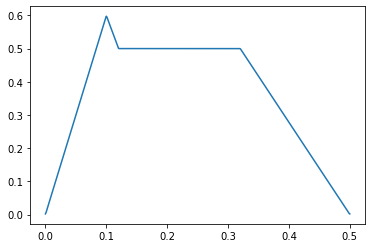

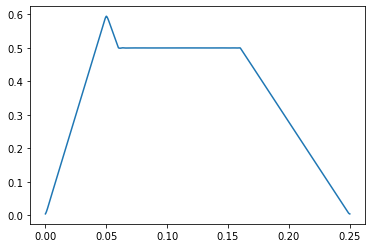

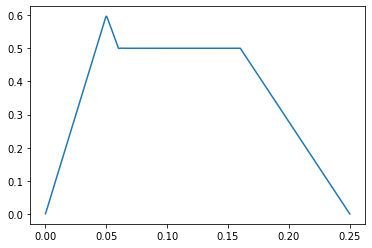

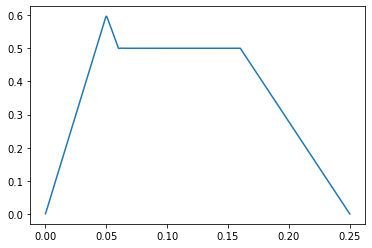

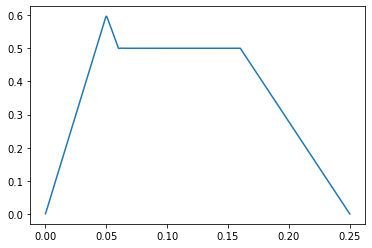

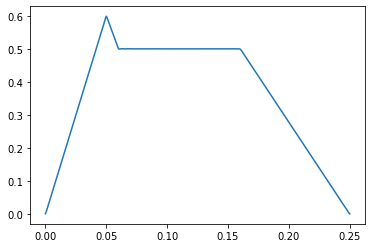

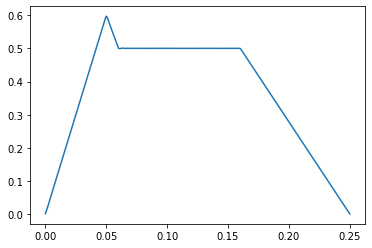

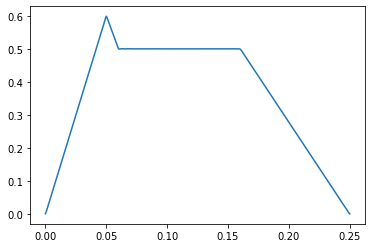

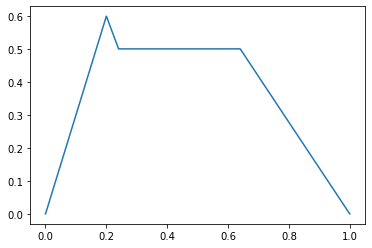

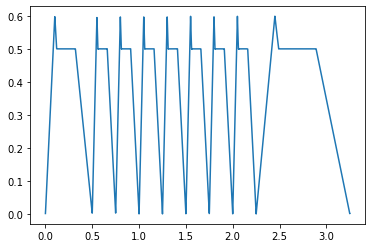

In [12]:
# Volume Variation Function Attack, Decay, Sustain and Release (ADSR)
def adsr(input_note):
    
    
    note_length = len(input_note)
    
    
    print(note_length)
    
    attack_length = round(note_length*0.2)
    
    decay_length = round(note_length*0.04)
    
    sustain_length = round(note_length*0.4)
    
    release_length = round(note_length*0.36)

    n_attack = np.arange(0, attack_length, 1)
    
    attack_equation = (0.6/attack_length)*n_attack
    
    
    
    
    n_decay = np.arange(0, decay_length, 1)
    
    decay_equation = 0.6 - (0.1/decay_length)*n_decay
    
    sustain_equation = np.ones(sustain_length)*0.5
    
    n_release = np.arange(0, release_length, 1)
    
    release_equation = 0.5 - (0.5/release_length)*n_release
    
    input_note_attack_portion = input_note[0:attack_length]*attack_equation
    input_note_decay_portion = input_note[attack_length:attack_length+decay_length]*decay_equation
    input_note_sustain_portion = input_note[attack_length+decay_length:attack_length+decay_length+sustain_length]*sustain_equation
    input_note_release_portion = input_note[attack_length+decay_length+sustain_length:attack_length+decay_length+sustain_length+release_length]*release_equation
    
    
    return np.concatenate((input_note_attack_portion, input_note_decay_portion, input_note_sustain_portion, input_note_release_portion))
    
    """Generates an ADSR envelope and applies it to a note.

        A: Linear increase to 60% amplitude over 20% length.
        D: Linear decrease to 50% amplitude over 4% length.
        S: Constant 50% amplitude over 40% length.
        R: Linear decrease to 0% amplitude over 36% length.

    Args:
        note: The note to be modified.

    Returns:
        A note that has been scaled by the ADSR envelope.
    """
    # TO DO: Enter code here to finish the adsr function

def Scarborough_Fair_ADSR():   
    
    adsr_score = [adsr(music_note) for music_note in SF_score]

    for music_note_adsr in adsr_score:
        display_envelope(music_note_adsr)
   
    display_envelope(np.concatenate(adsr_score))

    play(adsr_score, False)

Scarborough_Fair_ADSR()

In [13]:
# Use your function Apply an ADSR envelope to each note.


# Play the audio sample


# Display the envelope
array = np.asarray([0, 1, 2, 3, 4, 5, 6, 7])

print(array[0:2])
print(array[0:len(array)-2])
print(array[len(array)-2:len(array)])


print(np.pad(array, (0, 10)))



def test(arrayin):
    
    for val in arrayin:
        val = val+10
        print(val)

test(array)
print(array)
    

[0 1]
[0 1 2 3 4 5]
[6 7]
[0 1 2 3 4 5 6 7 0 0 0 0 0 0 0 0 0 0]
10
11
12
13
14
15
16
17
[0 1 2 3 4 5 6 7]


In [14]:
def create_offset_note(input_note, offset):
    
    #the overlapping portions need to be multiplied by 0.5 to ensure 
    #the range of the final piece remains below 1
    
    offset_start = 0.5*np.asarray(input_note[0:offset])
    #apply adsr here
    middle_portion = input_note[0:len(input_note)-offset]
    offset_end = 0.5*np.asarray(input_note[len(input_note)-offset:len(input_note)])
    
    print("length offset note ", len(np.concatenate((offset_start, middle_portion, offset_end))))
    
    return np.concatenate((offset_start, middle_portion, offset_end))

In [15]:
def overlap(notes, offset):
    
    #get an array of note lengths
    note_lengths = [len(music_note) for music_note in notes]
    
    #determine total length of the score
    score_length = np.sum(note_lengths)
    
    #create a blank array that is the length of the score
    #all the overlapping notes will be added here
    overlapped_notes = np.zeros(score_length)
    
    #create notes that have their overlapping portions scaled and added
    #according to the offset
#     offset_notes = [create_offset_note(music_note, offset) for music_note in notes]
    
    #the index where an offset note should be added to the score
    next_index = 0
    
    for offset_note in notes:
    

            
        if(next_index == 0):
            zeros_append = score_length - (len(offset_note))
            next_index = next_index + len(offset_note) - offset
            offset_note = np.pad(offset_note, (0, zeros_append))
        else:
            zeros_prepend = next_index
            zeros_append = score_length - (zeros_prepend + len(offset_note))
            next_index = next_index + len(offset_note) - offset
            offset_note = np.pad(offset_note, (zeros_prepend, zeros_append))
        
    
        overlapped_notes = overlapped_notes + offset_note
        


    
    return overlapped_notes

    """Joins notes together with overlap between consecutive notes.

    Args:
        notes: An array of notes to be joined.
        offset: The amount of allowable overlap between consecutive notes.

    Returns:
        A score made from the input notes.
    """



    


4000
2000
2000
2000
2000
2000
2000
2000
8000


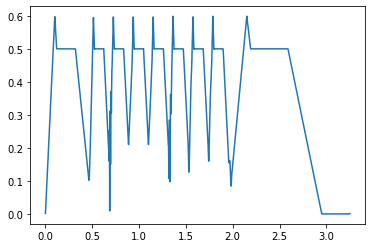

In [16]:
# Smooth the sound by overlapping the notes.

def Scarborough_Fair_ADSR_Overlap():
        
    
    adsr_score = [adsr(music_note) for music_note in SF_score]
    
    overlapped_adsr_score = overlap(adsr_score, 300)
    
    display_envelope(overlapped_adsr_score,-1)
    
#     print(np.shape(overlapped_adsr_score))
    
    play(overlapped_adsr_score, True)
    

Scarborough_Fair_ADSR_Overlap()

# this builds the signal after applying adsr and then overlapping notes
# signal = overlap([adsr(i) for i in notes], 100) 

# # Play the audio sample
# play(signal)

# # Display the envelope
# display_envelope(signal,-1)




## Discussion

#### Is the application of an ADSR envelope an invertible operation? How might the effects of volume variation be inverted?

The ADSR filter is an invertible operation. If you consider the 4 constituent parts they have the following equations:



The inverse equations would be:







#### What is the effect of the ADSR on the energy of a signal?

The energy of the signal decreases. 

#### Is an envelope function a linear operation?

Yes it is linear. 

In [17]:
A_Note = np.sin(2*np.pi*A*n_w)






# 2) One Dimensional Convolution Sum

In [18]:
# TO DO: define the basic signal generating functions

# step function
def u(t):
    
# ramp function
def r(t):
    

array = np.asarray([0, 1, 2, 3, 4, 5])
print(array[len(array)-2:len(array)])

print(array[0:len(array)-2])

IndentationError: expected an indented block (<ipython-input-18-590db5163462>, line 7)

In [ ]:
# Use a 4s long ramp sampled at 10 samples/s for the signal
# Use a 4s long step signal for the kernel

end_time=4 # end time in the time interval [0,end_time]
fs=10 # sampling frequency
ts=1/fs #sampling time

# TO DO: create the time vector
tvec = 

# TO DO: define the convolution kernel
kernel =

nKern = len(kernel)

kflip = kernel[::-1] 

# TO DO: define the signal to be convolved with the kernel
signal1= 
# zero-padded data for convolution
signal1 = np.concatenate( (np.zeros(nKern+1),signal1,np.zeros(nKern+1)) ,axis=0)
nSign = len(signal1)


nConv = nSign + nKern - 1
# initialize convolution output
conv_res = 

## convolution in animation

# run convolution
for ti in range(nKern,nConv-nKern+2):    
    # get a chunk of data
    tempdata = 
    
    # compute dot product (don't forget to flip the kernel backwards!)
    conv_res[ti] = 
    
    # draw plot
    pl.cla() # clear the axis
    plt.plot((np.arange(0,nSign)-nKern)/fs,signal1)
    plt.plot((np.arange(ti-nKern,ti)-nKern)/fs,kflip)
    plt.plot((np.arange(nKern,ti)-nKern)/fs,conv_res[nKern:ti])
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    t.sleep(.01)
    

# cut off edges
conv_res = conv_res[nKern:-nKern]

## Discussion


- **If you do not normalize your computed convolution sum by dividing by thesampling rate, the magnitude is actually incorrect and does not representthe convolution result.  Why is dividing by sampling rate or multiplyingby sampling time important?  (Hint:  you have done this in EE 235, checkback with the relevant labs and you should find your answer)**









- **How is the convolution sum different from the convolution integral?**